In [85]:
import PIL
from PIL import Image
import numpy as np
import os
import random 
import cv2 as cv
import pandas as pd
# open method used to open different extension image file
TRAIN_DATA_FOLDER = "data/train"
train_tumor_filenames = os.listdir(f'{TRAIN_DATA_FOLDER}/tumor/')
num_train_tumor_files = len(train_tumor_filenames)
print("Number of Training Tumor Files: ", num_train_tumor_files)

train_notumor_filenames = os.listdir(f'{TRAIN_DATA_FOLDER}/notumor/')
num_train_notumor_files = len(train_notumor_filenames)
print("Number of Training No Tumor Files: ", num_train_notumor_files)

train_files_to_display = random.sample(range(num_train_tumor_files), k=10)
print(train_files_to_display)



Number of Training Tumor Files:  1339
Number of Training No Tumor Files:  1595
[259, 1209, 1256, 846, 1070, 583, 753, 933, 713, 349]


## Display Random Tumor Photos

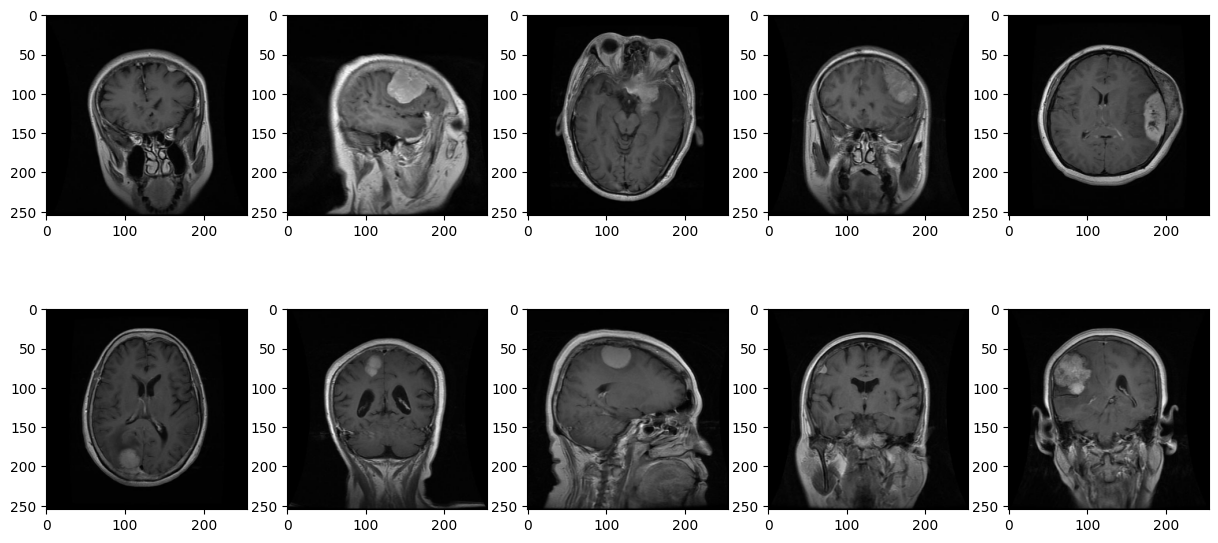

In [86]:
import matplotlib.pyplot as plt

figs, axs = plt.subplots(2,5, figsize=(15, 7))

for random_file_i,ax in enumerate(figs.axes):
    img = cv.imread(f"{TRAIN_DATA_FOLDER}/tumor/{train_tumor_filenames[random_file_i]}")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (255, 255))

    ax = plt.subplot(2, 5, random_file_i + 1)
    ax.imshow(img)

## Display Random No Tumor Photos

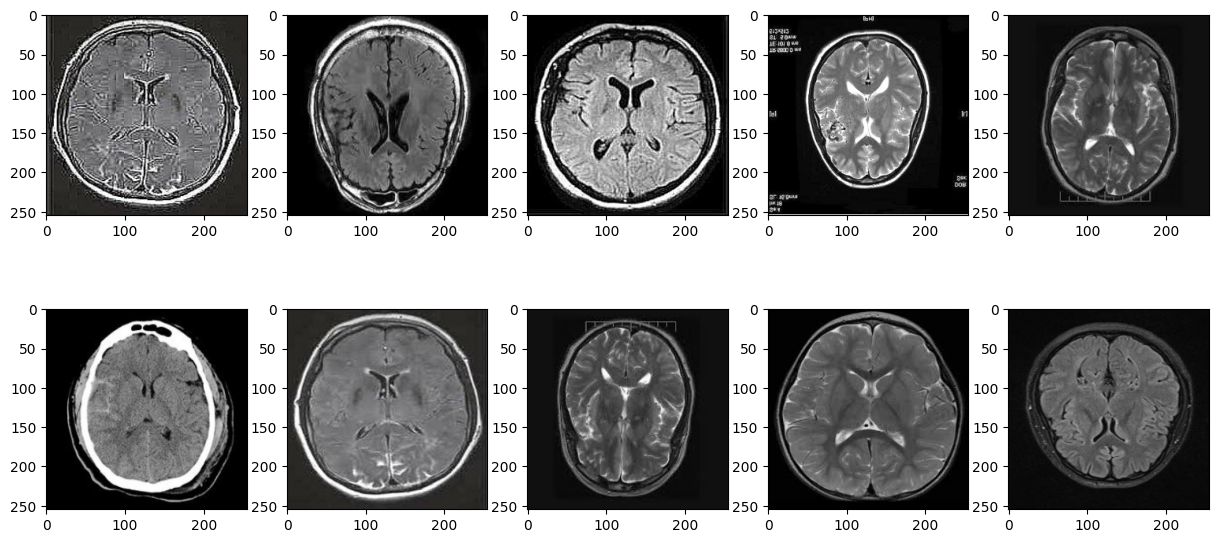

In [87]:
figs, axs = plt.subplots(2,5, figsize=(15, 7))

for random_file_i,ax in enumerate(figs.axes):
    img = cv.imread(f"{TRAIN_DATA_FOLDER}/notumor/{train_notumor_filenames[random_file_i]}")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (255, 255))

    ax = plt.subplot(2, 5, random_file_i + 1)
    ax.imshow(img)

# Tumor Image Statistics

## Image Statistics

In [88]:
tumor_mean_vec = [];
tumor_min_vec = [];
tumor_max_vec = [];
tumor_stdev_vec = [];
tumor_var_vec = [];

for i in range(num_train_tumor_files):
    img1 = cv.imread(f"{TRAIN_DATA_FOLDER}/tumor/{train_tumor_filenames[i]}")
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    # img = cv.resize(img, (255, 255))
    # img = Image.fromarray(img)
    # img = Image.open(f"{TRAIN_DATA_FOLDER}/tumor/{train_tumor_filenames[i]}")

    tumor_mean_vec.append(np.mean(img1))
    tumor_min_vec.append(np.min(img1))
    tumor_max_vec.append(np.max(img1))
    tumor_stdev_vec.append(np.std(img1))
    tumor_var_vec.append(np.var(img1))

print("Num Tumor Files Used: ", i)
# print(tumor_mean_vec)
# print(tumor_min_vec)
# print(tumor_max_vec)
# print(tumor_stdev_vec)
# print(tumor_var_vec)

notumor_mean_vec = [];
notumor_min_vec = [];
notumor_max_vec = [];
notumor_stdev_vec = [];
notumor_var_vec = [];

for i in range(num_train_tumor_files):
    img2 = cv.imread(f"{TRAIN_DATA_FOLDER}/notumor/{train_notumor_filenames[i]}")
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    # img = cv.resize(img, (255, 255))
    # img = Image.fromarray(img)
    # img = Image.open(f"{TRAIN_DATA_FOLDER}/notumor/{train_notumor_filenames[i]}")

    notumor_mean_vec.append(np.mean(img2))
    notumor_min_vec.append(np.min(img2))
    notumor_max_vec.append(np.max(img2))
    notumor_stdev_vec.append(np.std(img2))
    notumor_var_vec.append(np.var(img2))
print("Num No Tumor Files Used: ", i)



Num Tumor Files Used:  1338
Num No Tumor Files Used:  1338


,tumor_mean,notumor_mean,tumor_min,notumor_min,tumor_max,notumor_max,tumor_stdev,notumor_stdev
0,29.755527,95.769013,0,0,255,255,40.406063,68.115895
1,57.733608,62.731119,0,0,255,255,62.842319,64.509670
2,35.298054,96.315563,0,0,251,255,43.256890,85.582449
3,38.467251,56.951362,0,0,255,255,45.933818,73.573610
4,31.882446,48.294775,0,0,255,255,43.386636,43.275111
...,...,...,...,...,...,...,...,...
1334,44.446110,46.391222,0,0,255,255,49.817165,60.196090
1335,54.819599,57.262420,0,0,255,255,50.008448,58.660046
1336,50.438994,35.426455,0,0,255,255,64.393728,38.072287
1337,38.042339,62.404099,0,0,255,255,38.303284,64.542816


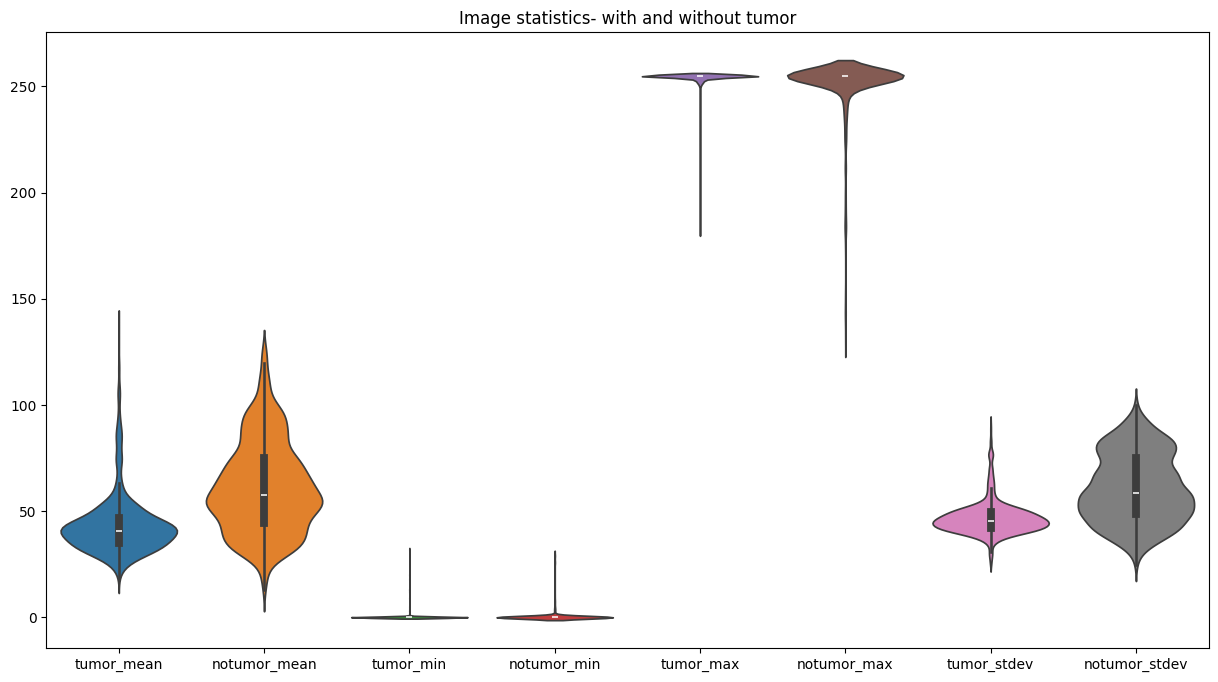

In [89]:
import seaborn as sns

df = pd.DataFrame(list(zip(tumor_mean_vec,notumor_mean_vec,tumor_min_vec,notumor_min_vec,tumor_max_vec,notumor_max_vec,tumor_stdev_vec,notumor_stdev_vec)),columns = ["tumor_mean","notumor_mean","tumor_min","notumor_min","tumor_max","notumor_max","tumor_stdev","notumor_stdev"])
display(df)

# Create violin plot to compare image statistics for tumor and non-tumor images
plt.figure(figsize=(15, 8))
ax = sns.violinplot(data=df)
plt.title("Image statistics- with and without tumor")
plt.show()

## Histogram Tumor/NoTumor

In [90]:
import matplotlib.pyplot as plt
def getRed(R): return '#%02x%02x%02x'%(R,0,0)
def getGreen(G): return '#%02x%02x%02x'%(0,G,0)
def getBlue(B):return '#%02x%02x%02x'%(0,0,B)

def plot_histogram_separate_rgb(hst):
    Red=hst[0:256] # indicates Red
    Green=hst[256:512] # indicated Green
    Blue=hst[512:768] # indicates Blue
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # plots a figure to display GREEN Histogram
    for i in range(0, 256):
        plt.bar(i, Red[i], color = getRed(i),alpha=0.3)
    plt.subplot(1,3,2) # plots a figure to display RED Histogram
    for i in range(0, 256):
        plt.bar(i, Green[i], color = getGreen(i),alpha=0.3)
    plt.subplot(1,3,3) # plots a figure to display BLUE Histogram
    for i in range(0, 256):
        plt.bar(i, Blue[i], color = getBlue(i),alpha=0.3)
    plt.show()

# hst=imNoTumor.histogram()
# print(hst)
# plot_histogram(hst)


/var/folders/sj/5fy42mkj53n0d261br7nmzzc0000gn/T/ipykernel_78147/3624319849.py:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img1.ravel(),256,[0,256])
/var/folders/sj/5fy42mkj53n0d261br7nmzzc0000gn/T/ipykernel_78147/3624319849.py:17: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img2.ravel(),256,[0,256])


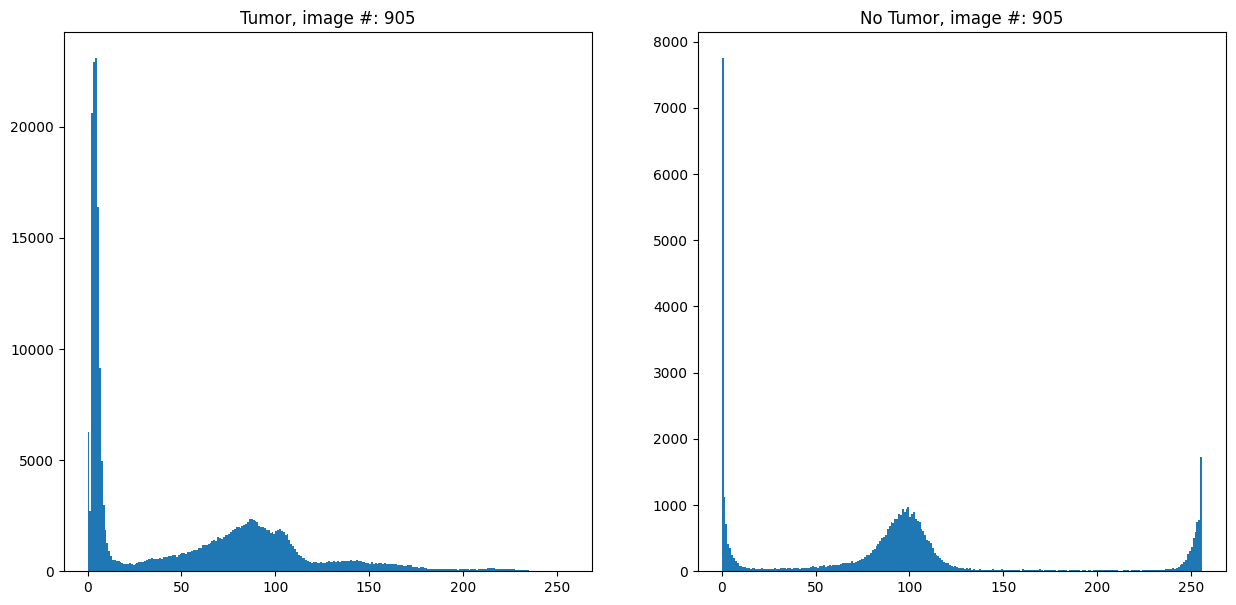

In [91]:
from PIL import Image
import matplotlib.pyplot as plt

i = random.randint(0, len(train_tumor_filenames))
img1 = cv.imread(f"{TRAIN_DATA_FOLDER}/tumor/{train_tumor_filenames[i]}", cv.IMREAD_GRAYSCALE)
hst1=cv.calcHist([img1],[0],None,[256],[0,256])

img2 = cv.imread(f"{TRAIN_DATA_FOLDER}/notumor/{train_notumor_filenames[i]}", cv.IMREAD_GRAYSCALE)
# img2 = cv.cvtColor([img2], cv.IMREAD_GRAYSCALE)
hst2=cv.calcHist([img2],[0],None,[256],[0,256])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(img1.ravel(),256,[0,256])
plt.title(f"Tumor, image #: {i}")
plt.subplot(1,2,2)
plt.hist(img2.ravel(),256,[0,256])
plt.title(f"No Tumor, image #: {i}")

plt.show()
# plot_histogram_separate_rgb(hst)




## Histogram Equalization

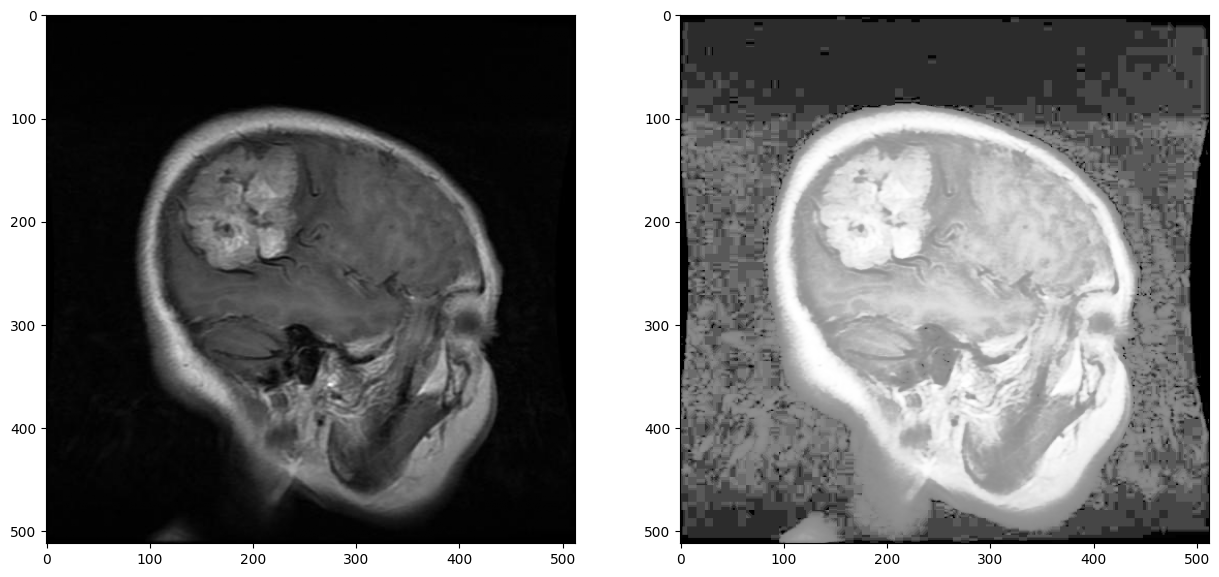

In [92]:
import cv2 as cv

i = random.randint(0, len(train_tumor_filenames))

img1 = cv.imread(f"{TRAIN_DATA_FOLDER}/tumor/{train_tumor_filenames[i]}",cv.IMREAD_GRAYSCALE)
hist_eq = cv.equalizeHist(img1)
hist_eq = cv.cvtColor(hist_eq,cv.COLOR_GRAY2RGB)

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.imshow(img1, cmap= 'gray')

plt.subplot(1,2,2)
plt.imshow(hist_eq, cmap= 'gray')
plt.show()

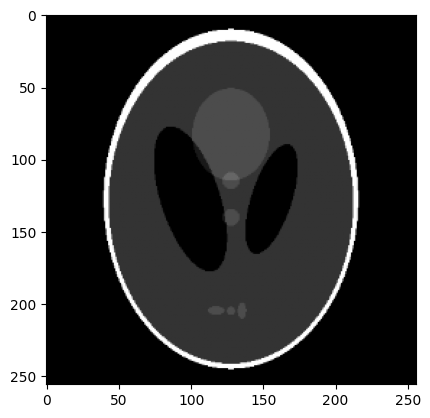

In [93]:
import skimage

img1 = skimage.data.shepp_logan_phantom()
img1 = cv.resize(img1, (256, 256))
plt.imshow(img1,cmap='gray')

/var/folders/sj/5fy42mkj53n0d261br7nmzzc0000gn/T/ipykernel_78147/3426066771.py:8: RuntimeWarning: divide by zero encountered in log
  mag_1 = 20*np.log(np.abs(fft_image_1))


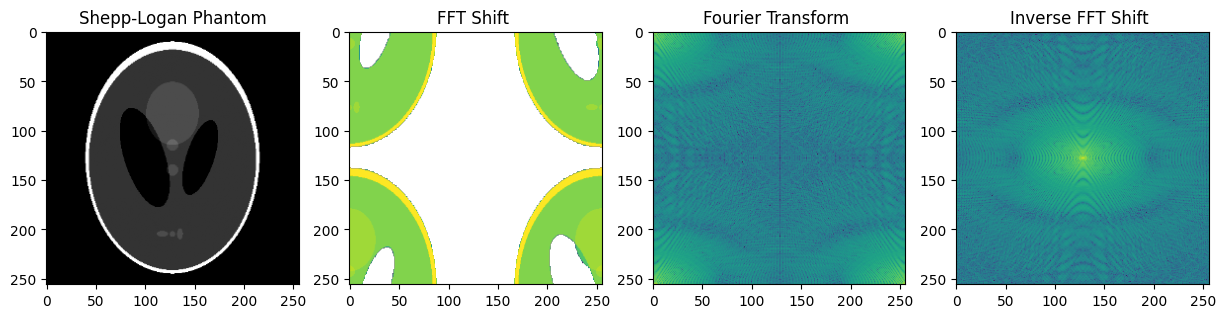

In [94]:
import scipy
from scipy.fft import *

fft_image_1 = fftshift(img1)
fft_image_2 = fftn(fft_image_1)
fft_image_3 = ifftshift(fft_image_2)

mag_1 = 20*np.log(np.abs(fft_image_1))
mag_2 = 20*np.log(np.abs(fft_image_2))
mag_3 = 20*np.log(np.abs(fft_image_3))

plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.imshow(img1, cmap='gray')
plt.title("Shepp-Logan Phantom")
plt.subplot(1,4,2)
plt.imshow(mag_1, cmap='viridis')
plt.title("FFT Shift ")

plt.subplot(1,4,3)
plt.imshow(mag_2, cmap='viridis')
plt.title("Fourier Transform ")

plt.subplot(1,4,4)
plt.imshow(mag_3, cmap='viridis')
plt.title("Inverse FFT Shift ")

plt.show()




Text(0.5, 1.0, 'Convolved Image')

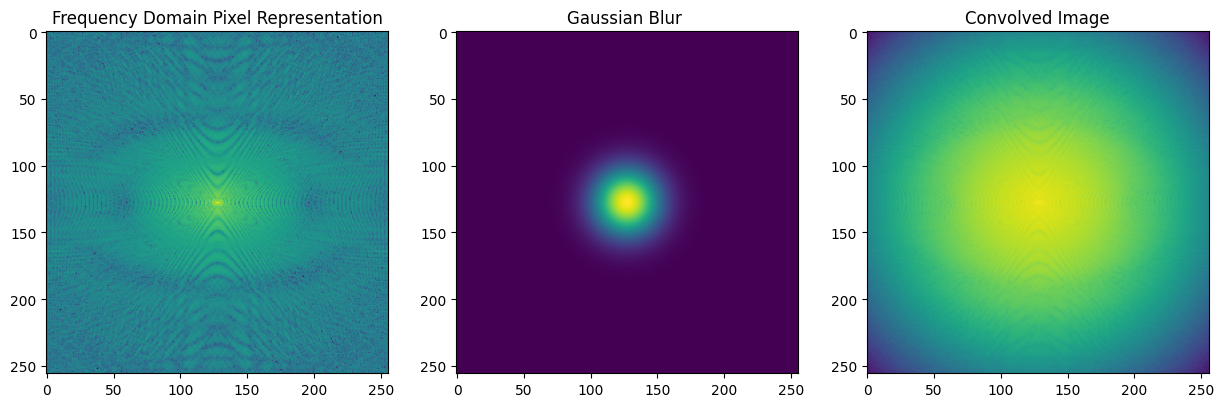

In [95]:
# Generate a Gaussian blur mask
n_cols, n_rows = 256, 256
sigma_xy = 25
center_y, center_x = n_rows / 2, n_cols / 2
x = np.linspace(0, n_rows, n_rows)
y = np.linspace(0, n_cols, n_cols)
X, Y = np.meshgrid(x, y)
blurmask = (1/np.sqrt((2*np.pi*(sigma_xy**2))))*np.exp(-((X-center_x)**2 + (Y-center_y)**2)/(2*sigma_xy**2))
blurmask = np.exp(-(((X - center_x) / sigma_xy) ** 2 + ((Y - center_y) / sigma_xy) ** 2))
convolved_array = fft_image_3 * blurmask
convolved_image = 20*np.log(np.abs(convolved_array))

plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
plt.imshow(mag_3, cmap='viridis')
plt.title("Frequency Domain Pixel Representation")
plt.subplot(1,3,2)
plt.imshow(blurmask, cmap='viridis')
plt.title("Gaussian Blur ")
plt.subplot(1,3,3)
plt.imshow(convolved_image, cmap='viridis')
plt.title("Convolved Image")

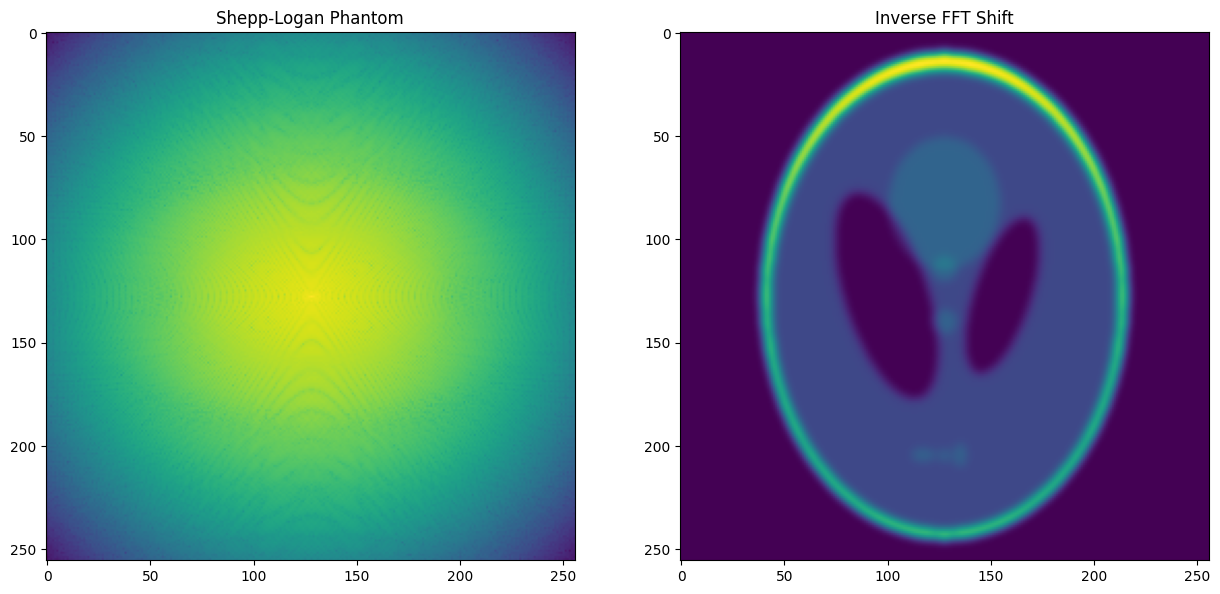

In [84]:
import scipy
from scipy.fft import *

fft_image_1 = fftshift(convolved_array)
fft_image_2 = ifftn(fft_image_1)
fft_image_3 = ifftshift(fft_image_2)
fft_to_image = Image.fromarray(np.abs(fft_image_3))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(convolved_image, cmap='viridis')
plt.title("Shepp-Logan Phantom")
plt.subplot(1,2,2)
plt.imshow(np.abs(fft_to_image), cmap='viridis')
plt.title("Inverse FFT Shift Post Blur")
plt.show()